### In this notebook I<sup>1</sup> am exploring some of the *very* basic machine learning concepts I have been studying (using scikit-learn.)

<sup>1</sup>= *Alex Scott, Amateur Data Scientist*

Specific questions: How have olympic shot put results progressed over time, and how are they likely to progress in the near future?

In [4]:
#necessary imports
import numpy as np
import scipy.stats as st
import sklearn.linear_model as lm
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns; sns.set()
%matplotlib inline

C:\Users\scott\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Text(0, 0.5, 'Result (m)')

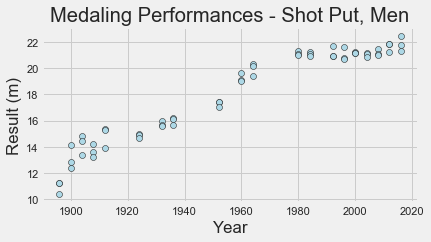

In [367]:
#grab some data -- i'll use medal-winning olympic shot put results for men
athletics = pd.read_csv('results.csv')
menshot = athletics.loc[athletics['Event'] == 'Shot Put Men']
menshot['Result'] = menshot['Result'].astype('float')
X = menshot['Year']
y = menshot['Result']


#plot the data points
fig, ax = plt.subplots(1,1, figsize=(6,3))
plt.style.use('fivethirtyeight')
plt.scatter(X, y, facecolor="lightblue", edgecolor="k")
ax.set_title("Medaling Performances - Shot Put, Men")
ax.set_xlabel("Year")
ax.set_ylabel("Result (m)")

In [51]:
menshot.groupby("Year")
menshot = menshot.sort_values(by="Year", ascending=True)
X, y = menshot['Year'], menshot['Result']
x_tr = np.linspace(1896., 2020, 60)

In [61]:
#now, a basic linear model:
lr = lm.LinearRegression()
lr.fit(X[:, np.newaxis], y)
y_lr = lr.predict(x_tr[:, np.newaxis])

#how accurate is our linear model?
from sklearn.metrics import r2_score
linearR2 = r2_score(y_lr,y)
print("R^2:", linearR2)

R^2: 0.8363415794227785


Text(1970, 16, '$R^2$= ~0.836')

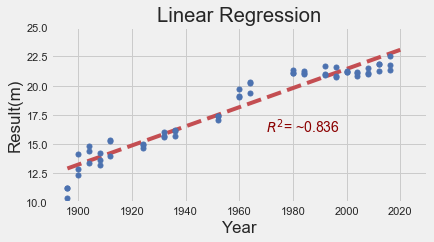

In [65]:
#plotting the basic linear model:
fig = plt.figure(figsize=(6,3))
ax = plt.axes()
ax.plot(x_tr, y_lr, '--r')
ax.plot(X, y, '.b', ms=10)
ax.set_xlim(1890, 2030)
ax.set_ylim(10, 25)
ax.set_title("Linear Regression")
ax.set_xlabel("Year")
ax.set_ylabel("Result(m)")
ax.annotate('$R^2$= ~0.836', xy=(1970, 16), color='darkred')

In [361]:
print("The linear model predicts that medaling results will be around", y_lr.max().round().astype('int'), "meters at the 2020 Olympics.")

The linear model predicts that medaling results will be around 23 meters at the 2020 Olympics.


The linear fit here is suprisingly strong, and it provides a prediction for 2020 that is totally reasonable (given that Kovacs, Crouser, and Walsh all eclipsed 22.90m at the 2019 World Championships). Still, there's room for improvement.

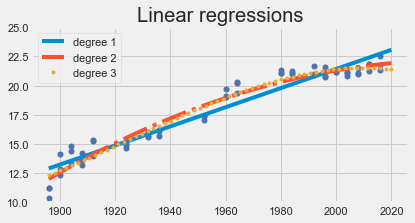

In [86]:
#let's try some nonlinear options
lrp = lm.LinearRegression()
fig = plt.figure(figsize=(6,3))
ax = plt.axes()
ax.plot(X,y, '.b', ms=10)

for deg, s in zip([1, 2, 3], ['-','-.','.']):
    lrp.fit(np.vander(X, deg+1), y)
    y_lrp = lrp.predict(np.vander(x_tr, deg+1))
    ax.plot(x_tr, y_lrp, s,
           label=f'degree {deg}')
    ax.legend(loc=2)
    ax.set_xlim(1890, 2026)
    ax.set_ylim(10, 25)
    ax.set_title("Linear regressions")

According to this, a regression of degree 2 (quadratic) appears to fit the datapoints better than degree 1 (simple linear). 

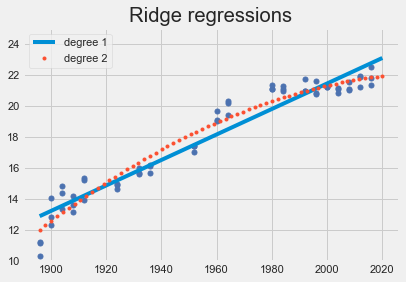

In [91]:
#trying ridge regression
ridge = lm.RidgeCV()

fig = plt.figure()
ax = plt.axes()
ax.plot(X, y, '.b', ms=10)
for deg, s in zip([1,2], ['-', '.']):
    ridge.fit(np.vander(X, deg + 1), y)
    y_ridge = ridge.predict(np.vander(x_tr, deg + 1))
    ax.plot(x_tr, y_ridge, s,
            label='degree ' + str(deg))
    ax.legend(loc=2)
    ax.set_xlim(1890, 2026)
    ax.set_ylim(10, 25)
    ax.set_title("Ridge regressions")


Ridge confirms that a polynomial fit outperforms linearfit. See:

In [100]:
ridge.fit(np.vander(X, 2), y)
y_ridge1 = ridge.predict(np.vander(x_tr, 2))
print("Linear fit:", "R\N{SUPERSCRIPT TWO} = ", r2_score(y_ridge1, y))
ridge.fit(np.vander(X, 3), y)
y_ridge2 = ridge.predict(np.vander(x_tr, 3))
print("Quadratic fit:", 'R\N{SUPERSCRIPT TWO} = ', r2_score(y_ridge2, y))

Linear fit: R² =  0.836289547443115
Quadratic fit: R² =  0.8955515960438667


R<sup>2</sup> calculations confirm that the quadratic model is a better fit for the data points. This is good enough for now; however, as time passes, the quadratic fit will no longer be appropriate. Marks are far more likely to level off as we approach human potential, or rise as we discover new techniques, than they are to decrease (as the quadratic would predict.)

In [115]:
## let's do the logistic regression just to see
from scipy.optimize import curve_fit

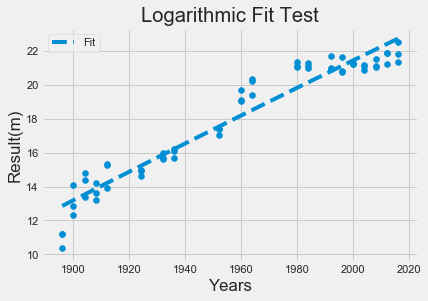

In [190]:
##plt.plot(X, y, '.b', ms=10, label="Original Data")

#Fit the function y = a + b*ln(x) to the data
#Using the logarithmic least squares fitting formula from Wolfram Alpha
def fit_log(xs, ys):
    n = 60
    sylnx = 0.0
    sy = 0.0
    slnx = 0.0
    sln2x = 0.0
    for (xi,yi) in zip(xs,ys):
        sylnx += yi * np.log(xi)
        sy += yi
        slnx += np.log(xi)
        sln2x += (np.log(xi))**2
    b = ((n*sylnx)-(sy*slnx))/(n*sln2x-(slnx)**2)
    a = (sy - b*slnx)/n
    return b,a
    
(B, A) = fit_log(X, y)

fig = plt.figure()
ax = plt.axes()
ax.plot(X, [A + B*np.log(x) for x in X], '--', label='Fit')
ax.scatter(X, y)
ax.set_title('Logarithmic Fit Test')
ax.set_xlabel('Years')
ax.set_ylabel('Result(m)')
ax.legend(loc='best')
plt.show()

    
    
    

^ Keep working on this. Why is it plotting linear?

No handles with labels found to put in legend.


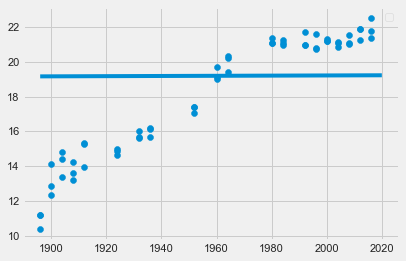

In [186]:
#another option: curve-fit

def func(x, a, b, c):
    return a* np.log(b * x) + c

x = x_tr
yhat = func(x, 1, 5, 10)

popt, pcov = curve_fit(func, x, yhat)

fig = plt.figure()
ax = plt.axes()
ax.scatter(X, y)
#ax.plot(X, func(x, *popt), '-r', label='Fit')
ax.plot(x, func(x, *popt))
ax.legend()
plt.show()

Problem identified. Need to adjust year (x) such that it begins at 0. 

In [248]:
menshotadj = menshot.copy()
menshotadj.groupby("Year")
menshotadj = menshotadj.sort_values(by="Year", ascending=True)
menshotadj['Year'] = menshot['Year'] - 1896
X1, y1 = menshotadj['Year'], menshotadj['Result']
x_tr1 = np.linspace(1, 124, 60)

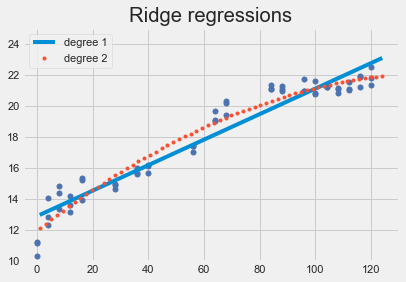

In [249]:
#confirm that it still works
fig = plt.figure()
ax = plt.axes()
ax.plot(X1, y1, '.b', ms=10)
for deg, s in zip([1,2], ['-', '.']):
    ridge.fit(np.vander(X1, deg + 1), y1)
    y_ridge1 = ridge.predict(np.vander(x_tr1, deg + 1))
    ax.plot(x_tr1, y_ridge1, s,
            label='degree ' + str(deg))
    ax.legend(loc=2)
    ax.set_xlim(-5, 130)
    ax.set_ylim(10, 25)
    ax.set_title("Ridge regressions")

C:\Users\scott\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


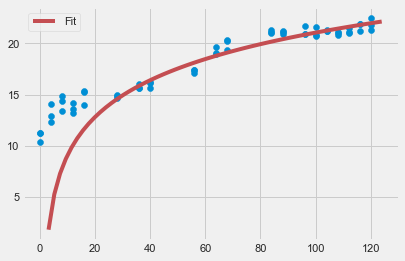

In [251]:
#try again
def func(x, a, b, c):
    return (a * np.log(b * x) + c)

x1 = x_tr1
yhat = func(x1, 5, 5, -10)

popt, pcov = curve_fit(func, x1, yhat)

fig = plt.figure()
ax = plt.axes()
ax.scatter(X1, y1)
ax.plot(x1, func(x, *popt), '-r', label='Fit')
ax.legend()
plt.show()

Not a very strong fit on the whole of the modern Olympics. Let's try since 1960.

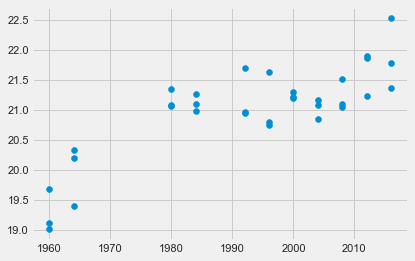

In [232]:
menshot60 = menshot.loc[menshot['Year'] >=1960]
X60, y60 = menshot60['Year'], menshot60['Result']
plt.scatter(X60, y60)

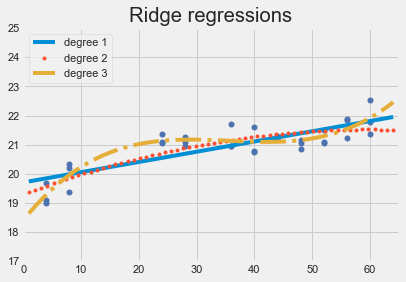

In [312]:
#Ridge
x_tr2 = np.linspace(1, 64, 60)
fig = plt.figure()
ax = plt.axes()
ax.plot(X60, y60, '.b', ms=10)
for deg, s in zip([1,2,3], ['-', '.','-.']):
    ridge.fit(np.vander(X60, deg + 1), y60)
    y_ridge1 = ridge.predict(np.vander(x_tr2, deg + 1))
    ax.plot(x_tr2, y_ridge1, s,
            label='degree ' + str(deg))
    ax.legend(loc=2)
    ax.set_xlim(0, 65)
    ax.set_ylim(17, 25)
    ax.set_title("Ridge regressions")

Here we can see for sure how unlikely it is that a the quadratic fit will be useful in predicting future events. We also see that a third degree polynomial is a bit optimistic. So, although a quadratic model fits the observations better, the linear model will be the best predictor (out of these three.) Let's try to produce another logarithmic fit.

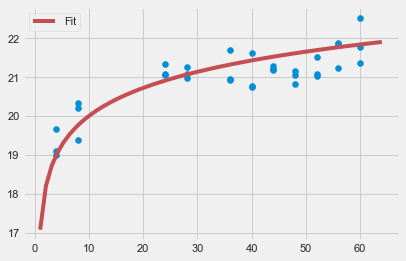

In [319]:
#try again
def func(x, a, b, c):
    return (a * np.log(b * x) + c)

x2 = x_tr2
yhat2 = func(x2, 1, 1.8, 16.5)

popt, pcov = curve_fit(func, x2, yhat2)

fig = plt.figure()
ax = plt.axes()
ax.scatter(X60, y60)
ax.plot(x2, func(x1, *popt), '-r', label='Fit')
ax.legend()
plt.show()


To my eye, this is a more realistic model. The formula: y = 1.0 * ln(1.8x) + 16.5, where x is twice the number of years since 1960 (due to the way the x variable is constructed)

In [366]:
print(" The logarithmic model predicts that \nmedaling performances in 2020 be around", func(128, 1, 1.8, 16.5).round(3), "m.")
print(" The predicted boost in results at the \n2020 Olympics relative to the 2016 \nOlympics is", (((func(120, 1, 1.8, 16.5)-func(112, 1, 1.8, 16.5))/(func(112, 1, 1.8, 16.5)))*100).round(3), "percent,", 100*(.00316*func(112, 1, 1.8, 16.5)).round(3), "cm,", (0.393701*(100*(.00316*func(112, 1, 1.8, 16.5))).round(3)).round(2), "inches,", "or 47% of Verne Troyer's Shoe.")

 The logarithmic model predicts that 
medaling performances in 2020 be around 21.94 m.
 The predicted boost in results at the 
2020 Olympics relative to the 2016 
Olympics is 0.316 percent, 6.9 cm, 2.71 inches, or 47% of Verne Troyer's Shoe.


### **Progress is slow in the post-Steroid era.**

**Caveats**:
- Limited dataset. Stronger set might include world championship performances and the results of non-medal winners.
- Limited data scientist. Stronger data scientist might include broader knowledgebase and more organized workflow.
- No one can really know anything.
